In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jalilahmadafshar","key":"740cf1508dcb795db03b2d4ae80f16f6"}'}

In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d clmentbisaillon/fake-and-real-news-dataset
!unzip fake-and-real-news-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset
License(s): CC-BY-NC-SA-4.0
  0% 0.00/41.0M [00:00<?, ?B/s]
100% 41.0M/41.0M [00:00<00:00, 853MB/s]
Archive:  fake-and-real-news-dataset.zip
  inflating: Fake.csv                
  inflating: True.csv                


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
fake_df = pd.read_csv("Fake.csv")
true_df = pd.read_csv("True.csv")

fake_df["label"] = 1  # Fake = 1
true_df["label"] = 0  # True = 0

In [7]:
df = pd.concat([fake_df, true_df], axis=0).reset_index(drop=True)
print("📊 Total dataset size:", df.shape)
print(df['label'].value_counts())

📊 Total dataset size: (44898, 5)
label
1    23481
0    21417
Name: count, dtype: int64


In [8]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
stop_words = set(stopwords.words('english'))

In [10]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    words = [word for word in text.split() if word not in stop_words]
    return ' '.join(words)

df['clean_text'] = df['text'].apply(clean_text)

In [11]:
from sklearn.model_selection import train_test_split

X = df['clean_text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=10000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix


models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(kernel='linear', random_state=42)
}

results = []


📘 Model: Decision Tree
Accuracy: 0.9959
Precision: 0.9962
Recall: 0.9960


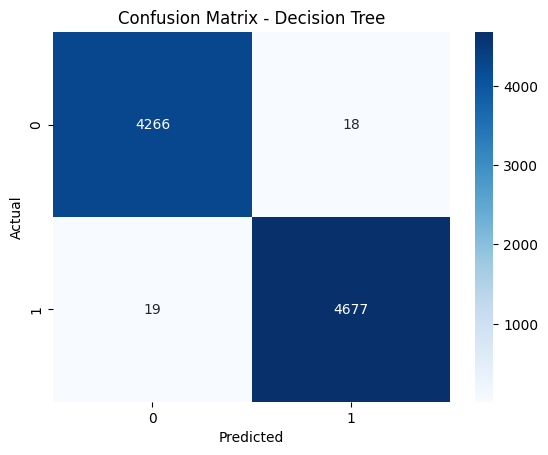


📘 Model: Random Forest
Accuracy: 0.9971
Precision: 0.9994
Recall: 0.9951


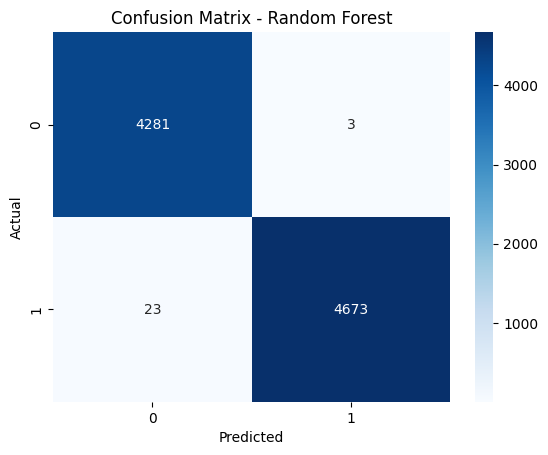


📘 Model: KNN
Accuracy: 0.6773
Precision: 0.6207
Recall: 0.9845


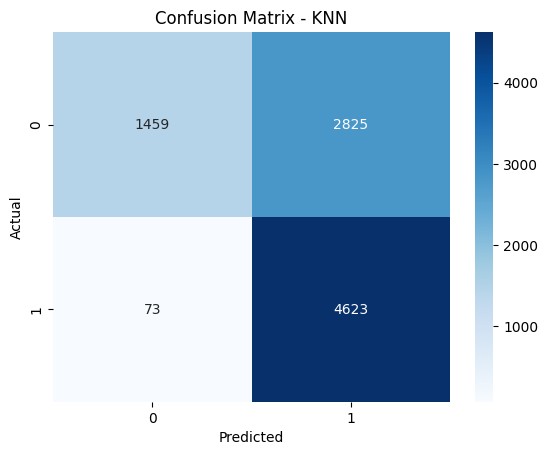


📘 Model: SVM
Accuracy: 0.9953
Precision: 0.9960
Recall: 0.9951


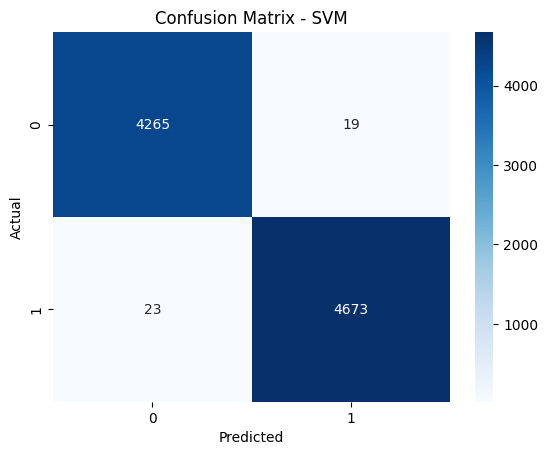

In [14]:
for name, model in models.items():
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    results.append([name, acc, prec, rec])

    print(f"\n📘 Model: {name}")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [15]:
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall'])
print("\n📈 Summary of Results:")
print(results_df)


📈 Summary of Results:
           Model  Accuracy  Precision    Recall
0  Decision Tree  0.995880   0.996166  0.995954
1  Random Forest  0.997105   0.999358  0.995102
2            KNN  0.677283   0.620704  0.984455
3            SVM  0.995323   0.995951  0.995102


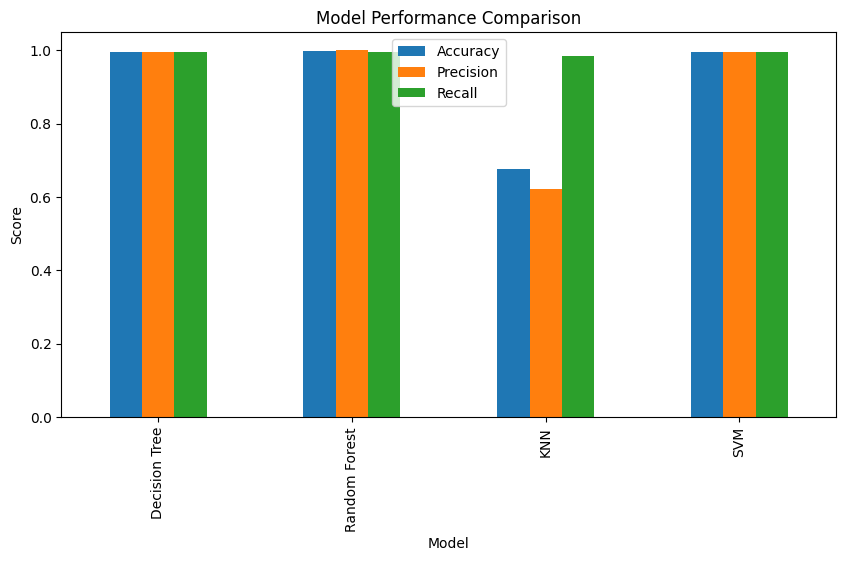

In [16]:
results_df.set_index('Model', inplace=True)
results_df.plot(kind='bar', figsize=(10,5))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.show()